In [1]:
!pip install plotly
!pip install bnlp_toolkit
!pip install wordcloud
!wget -q https://www.omicronlab.com/download/fonts/kalpurush.ttf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.4/53.4 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.4/175.4 kB 11.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.5/993.5 kB 19.3 MB/s eta 0:00:00
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171031 sha256=fee699670ecf087e33e3c6a187d9ef3a9f2820146d954f727f5a231dcd7a1ecb
  Stored in directory: /root/.cache/pip/wheels/31/8a/8c/315c9e5d7773f74b33d5ed33f075b49c6eaeb7cedbb86e2cf8
Successfully built emoji
  Attempting uninstall: wcwidth
    Found existing installation: wcwidth 0.2.10
    Uninstalling wcwidth-0.2.10:
      Successfully uninstalled wcwidth-0.2.10


In [1]:
import json
import pandas as pd
import numpy as np
from zipfile import ZipFile
import os
import re
import matplotlib.pyplot as plt
from plotly import graph_objects as go
import plotly.express as px
import seaborn as sns
from wordcloud import WordCloud
from random import randint
from bnlp import BengaliCorpus as corpus
from bnlp import CleanText

os.mkdir('articles')
os.mkdir('outputs')
with ZipFile("news1_output.zip", 'r') as zObject:
    zObject.extractall(path="outputs")
dir_path = '/content/outputs'
files_list=os.listdir(dir_path)
with ZipFile("news1.zip", 'r') as zObject:
    zObject.extractall(path="articles")
dir_path_in = '/content/articles'
files_list_in=os.listdir(dir_path_in)

month_map = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun',\
             7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}

punkt not found. downloading...


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [21]:
data_dicts = []
for fl in files_list:
  fl_path = dir_path + '/' + fl
  with open(fl_path, encoding='utf-8') as f:
    content = json.load(f)
  data_dicts.append(content)

df = pd.DataFrame(data_dicts)
for i, row in df.iterrows():
  if row['Category']=='nation':
    df.loc[i,'Category'] = 'national'
  elif row['Category']=='sport':
    df.loc[i,'Category'] = 'sports'
  elif row['Category']=='world':
    df.loc[i,'Category'] = 'international'
d1 = df[df['Sentiment']=='Positive']
d2 = df[df['Sentiment']=='Neutral']
d3 = df[df['Sentiment']=='Negative']
data_df = pd.concat([d1,d2,d3[:2432]], axis=0)
data_df

,Negative,Positive,Neutral,Sentiment,Category,Date,Time of generation
9,0.067,0.563,0.370,Positive,national,26/09/2023,21:3:29
43,0.257,0.525,0.218,Positive,kolkata,26/11/2023,21:12:42
54,0.278,0.402,0.319,Positive,kolkata,26/07/2023,20:57:6
85,0.150,0.508,0.343,Positive,kolkata,26/01/2023,20:40:30
151,0.334,0.427,0.239,Positive,sports,26/11/2023,21:14:54
...,...,...,...,...,...,...,...
3760,0.776,0.125,0.099,Negative,national,26/10/2023,21:7:22
3761,0.852,0.049,0.099,Negative,kolkata,26/11/2023,21:19:43
3763,0.607,0.052,0.341,Negative,international,26/08/2023,21:1:46
3764,0.535,0.145,0.320,Negative,national,26/07/2023,20:58:33


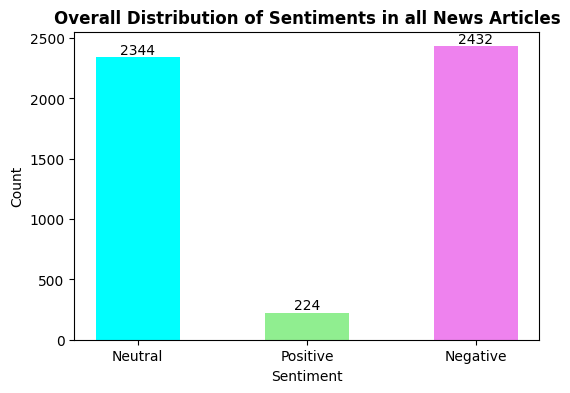

In [22]:
# overall distribution of sentiments

pos_df = data_df[data_df['Sentiment']=='Positive']
neg_df = data_df[data_df['Sentiment']=='Negative']
neu_df = data_df[data_df['Sentiment']=='Neutral']
tags = ['Neutral', 'Positive', 'Negative']
vals = [len(neu_df), len(pos_df), len(neg_df)]
colors = ['aqua', 'lightgreen', 'violet']
fig = plt.figure(figsize =(6, 4))
p1 = plt.bar(tags, vals, color = colors, width = 0.5)
for rect1 in p1:
    height = round(rect1.get_height(),2)
    width = round(rect1.get_width(),2)
    plt.annotate( "{}".format(height),(rect1.get_x() + width/2, height+.003),ha="center",va="bottom",fontsize=10)
plt.xlabel("Sentiment", fontsize=10)
plt.ylabel("Count", fontsize=10)
plt.title("Overall Distribution of Sentiments in all News Articles", fontsize=12, fontweight='bold')
plt.show()

In [23]:
# news category wise distribution of sentiments
cats = sorted(list(set(list(data_df['Category']))))
pos = {c:0 for c in cats}
neg = {c:0 for c in cats}
neu = {c:0 for c in cats}
for c in cats:
  df = data_df[data_df['Category']==c]
  df2 = df[df['Sentiment']=='Positive']
  pos[c] = len(df2)
  df2 = df[df['Sentiment']=='Negative']
  neg[c] = len(df2)
  df2 = df[df['Sentiment']=='Neutral']
  neu[c] = len(df2)

pos = sorted(pos.items(), key=lambda kv: (kv[1], kv[0]), reverse=True)
neg = sorted(neg.items(), key=lambda kv: (kv[1], kv[0]), reverse=True)
neu = sorted(neu.items(), key=lambda kv: (kv[1], kv[0]), reverse=True)
pos = [[p[0],p[1]] for p in pos if p[1]!=0]
neg = [[p[0],p[1]] for p in neg if p[1]!=0]
neu = [[p[0],p[1]] for p in neu if p[1]!=0]

tag1, tag2, tag3 = [e[0] for e in pos], [e[0] for e in neu], [e[0] for e in neg]
val1, val2, val3 = [e[1] for e in pos], [e[1] for e in neu], [e[1] for e in neg]

# print(pos)
# print(neg)
# print(neu)

fig = px.funnel_area(names=tag2, values=val2, title="News Category wise distribution of Neutral Sentiments")
fig.show()

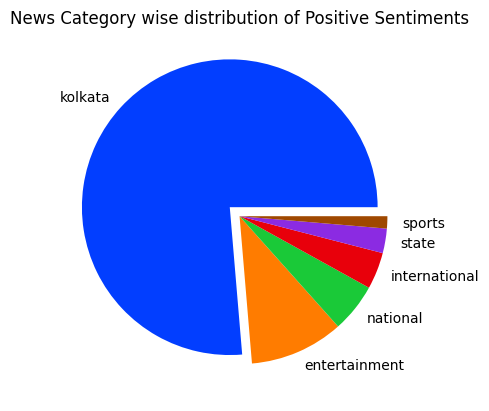

In [24]:
explode = [0] * len(val1)
explode[0] = 0.09
palette_color = sns.color_palette('bright')
plt.pie(val1, labels=tag1, colors=palette_color, explode=explode)
plt.title('News Category wise distribution of Positive Sentiments')
plt.show()

In [25]:
fig = go.Figure(go.Funnel(
    y = tag3,
    x = val3,
    textposition = "inside",
    textinfo = "value+percent total",
    opacity = 0.8, marker = {"color": ["blue" , 'aqua', "teal", "deepskyblue", "lightblue", "darkcyan"]}))

fig.update_layout(
    title=dict(text="News Category wise distribution of Negative Sentiments", font=dict(size=25)))

fig.show()

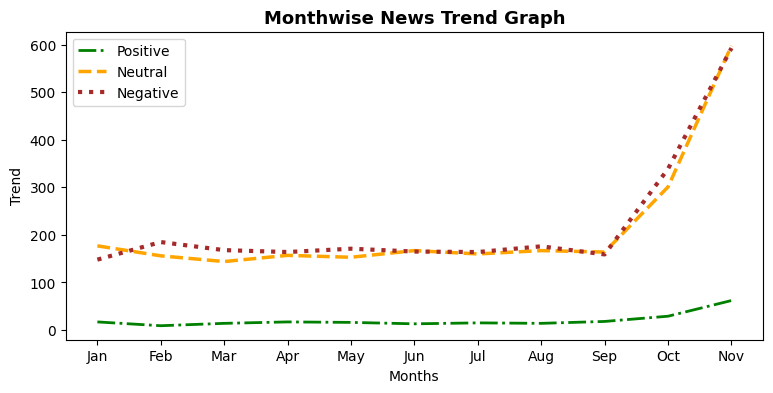

In [26]:
# trend graph
pos, neg, neu = [], [], []
months_list = []
months = [v for v in month_map.values()]
df = data_df
for i,row in df.iterrows():
  m = int(row['Date'][3:5])
  months_list.append(month_map[m])
df['Month'] = months_list
for m in months:
  df1 = df[df['Month']==m]
  df2 = df1[df1['Sentiment']=='Positive']
  pos.append(len(df2))
  df2 = df1[df1['Sentiment']=='Negative']
  neg.append(len(df2))
  df2 = df1[df1['Sentiment']=='Neutral']
  neu.append(len(df2))

fig = plt.figure(figsize =(9, 4))
plt.plot(months[:-1], pos[:-1], label = "Positive", linestyle="-.", color='green', linewidth = 2)
plt.plot(months[:-1], neu[:-1], label = "Neutral", linestyle="--", color='orange', linewidth = 2.5)
plt.plot(months[:-1], neg[:-1], label = "Negative", linestyle=":", color='brown', linewidth = 3)
plt.title('Monthwise News Trend Graph', fontweight ='bold',fontsize=13)
plt.xlabel("Months", fontsize=10)
plt.ylabel("Trend", fontsize=10)
plt.legend()
plt.show()

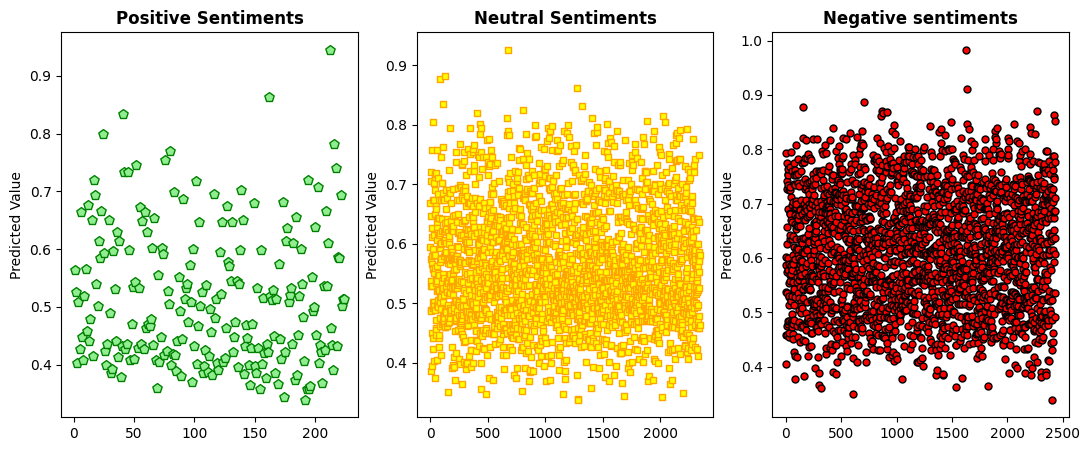

In [27]:
# Distribution of predicted values for all sentiments
pos_df = data_df[data_df['Sentiment']=='Positive']
neg_df = data_df[data_df['Sentiment']=='Negative']
neu_df = data_df[data_df['Sentiment']=='Neutral']
pos, x1 = list(pos_df['Positive']), [i for i in range(1,len(pos_df)+1)]
neu, x2 = list(neu_df['Neutral']), [i for i in range(1,len(neu_df)+1)]
neg, x3 = list(neg_df['Negative']), [i for i in range(1,len(neg_df)+1)]


fig = plt.figure(figsize =(13, 5))


plt.subplot(1, 3, 1)
plt.scatter(x1, pos, c='lightgreen', marker='p', edgecolor='green', s=50)
plt.title('Positive Sentiments', fontweight='bold')
plt.ylabel('Predicted Value')


plt.subplot(1, 3, 2)
plt.scatter(x2, neu, c='yellow', marker='s', edgecolor='orange', s=25)
plt.title('Neutral Sentiments', fontweight='bold')
plt.ylabel('Predicted Value')


plt.subplot(1, 3, 3)
plt.scatter(x3, neg, c='red', edgecolor='black', s=25)
plt.title('Negative sentiments', fontweight='bold')
plt.ylabel('Predicted Value')

# space between the plots
plt.show()

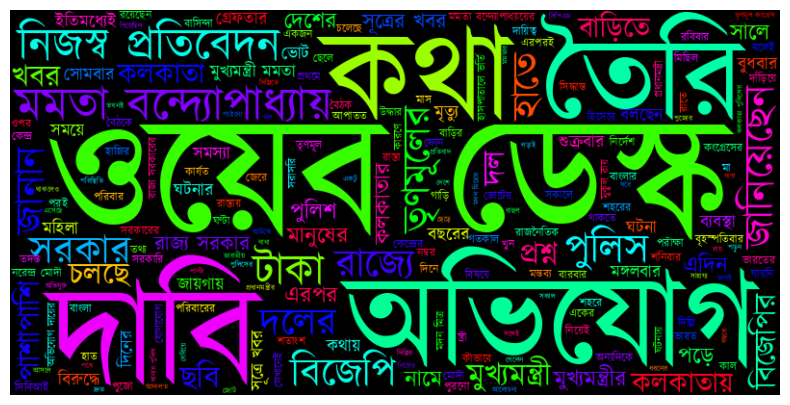

In [20]:
# wordcloud
stopwords = corpus.stopwords
punct = [p for p in corpus.punctuations]
bsw_df = pd.read_excel('stopwords_bangla.xlsx')
sw2 = list(bsw_df['words'])
stopwords.extend(sw2)
stopwords = sorted(list(set(stopwords)))
clean_text = CleanText(
   fix_unicode=True,
   unicode_norm=True,
   unicode_norm_form="NFKC",
   remove_url=True,
   remove_email=True,
   remove_emoji=True,
   remove_number=True,
   remove_digits=True,
   remove_punct=False,
   replace_with_url=" ",
   replace_with_email=" ",
   replace_with_number=" ",
   replace_with_digit=" ")

all_texts = ''
for fl in files_list_in:
  fl_path = dir_path_in + '/' + fl
  with open(fl_path, encoding='utf-8') as f:
    content = json.load(f)
  all_texts = all_texts + ' ' + content['title'] + ' ' + content['body']
pr_text = clean_text(all_texts)
tokens = pr_text.split()
tokens = [t for t in tokens if t not in stopwords]
tokens = [t for t in tokens if t not in punct]
pr_text2 = ' '.join(tokens)
pr_text2 = str(pr_text2)

regex = r"[\u0980-\u09FF]+"
wc = WordCloud(width=800, height=400,mode="RGBA",background_color='black',colormap="hsv", stopwords = stopwords,
              font_path="kalpurush.ttf",regexp=regex).generate(pr_text2)
plt.figure(figsize=(12, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()